In [ ]:
from google.colab import files

# Dosya yüklemek için
uploaded = files.upload()


Saving wine+quality.zip to wine+quality (2).zip


In [ ]:
import zipfile

# Zip dosyasının adını doğru gir (seninkisi wine+quality.zip)
with zipfile.ZipFile("wine+quality.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

print("Zip dosyası açıldı!")


Zip dosyası açıldı!


In [ ]:
import os

# Şu anki dizindeki dosyaları listele
print(os.listdir())


['.config', 'winequality-red.csv', 'winequality-white.csv', 'wine+quality (1).zip', 'wine+quality.zip', 'winequality.names', 'wine+quality (2).zip', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv("winequality-white.csv")
df.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [ ]:
# Veri tipi bilgisi
df.info()

# Eksik değer var mı?
print("\nEksik değer kontrolü:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB

Eksik değer kontrolü:

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quality dağılımı
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Dağılımı")
plt.xlabel("Kalite Skoru")
plt.ylabel("Şarap Sayısı")
plt.show()


ValueError: Could not interpret value `quality` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Veri setindeki sütun adlarını kontrol et
print(df.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [ ]:
# CSV dosyasını noktalı virgül ile ayırarak oku
df = pd.read_csv("winequality-white.csv", sep=";")

# İlk 5 satırı kontrol et
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


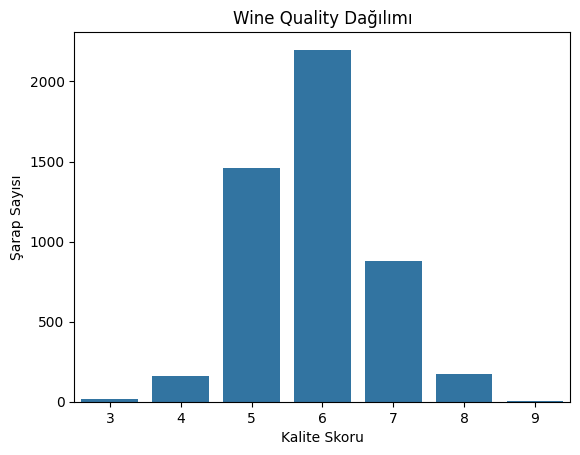

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quality dağılımı
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Dağılımı")
plt.xlabel("Kalite Skoru")
plt.ylabel("Şarap Sayısı")
plt.show()


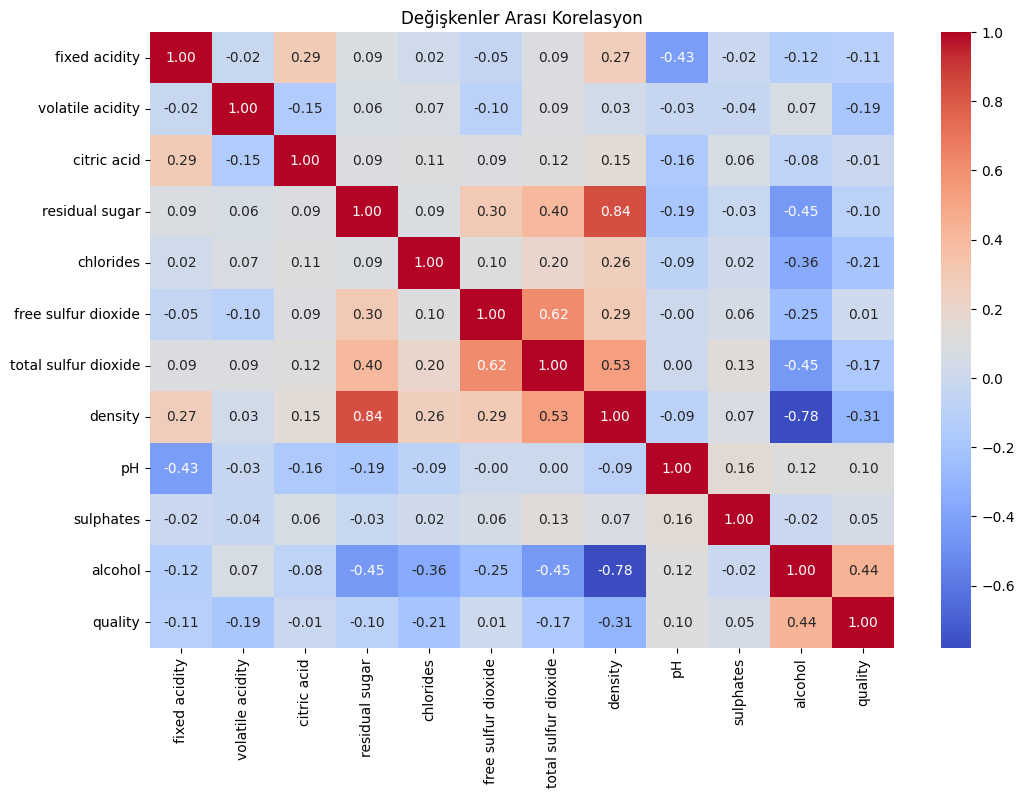

In [ ]:
# Korelasyon matrisi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası Korelasyon")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (X) ve hedef değişken (y)
X = df.drop('quality', axis=1)  # quality'yi çıkarıyoruz
y = df['quality']

# Veriyi eğitim (%80) ve test (%20) olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol et
print("Eğitim Verisi:", X_train.shape, "Test Verisi:", X_test.shape)


Eğitim Verisi: (3918, 11) Test Verisi: (980, 11)


In [ ]:
from sklearn.linear_model import LinearRegression

# Modeli oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Eğitim verisi ile tahmin yap
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# R² ve MSE hesapla
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Skoru: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


R² Skoru: 0.2653
Mean Squared Error (MSE): 0.5690


In [ ]:
from sklearn.decomposition import PCA

# PCA uygulamak için veriyi standartlaştırıyoruz (özellikle PCA için)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Veriyi standartlaştır
X_scaled = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=5)  # 5 ana bileşen kullanıyoruz
X_pca = pca.fit_transform(X_scaled)

# PCA ile yeni veriyi eğitim ve test verisine ayıralım
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Yeni model oluşturup eğitelim
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# PCA ile tahmin yap
y_pred_pca = model_pca.predict(X_test_pca)

# Performansı değerlendirelim
r2_pca = r2_score(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)

print(f"PCA ile R² Skoru: {r2_pca:.4f}")
print(f"PCA ile MSE: {mse_pca:.4f}")


PCA ile R² Skoru: 0.1741
PCA ile MSE: 0.6396


In [ ]:
# 'quality' değerini kategorik hale getir
df['quality_category'] = df['quality'].apply(lambda x: 'good' if x > 5 else 'bad')

# Yeni kategorik 'quality_category' sütununu kontrol et
df['quality_category'].value_counts()


,count
quality_category,
good,3258
bad,1640


In [ ]:
# Bağımsız değişkenler (X) ve yeni kategorik hedef değişken (y)
X = df.drop(['quality', 'quality_category'], axis=1)  # 'quality' ve 'quality_category'yi çıkarıyoruz
y = df['quality_category']

# Veriyi eğitim (%80) ve test (%20) olarak ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol et
print("Eğitim Verisi:", X_train.shape, "Test Verisi:", X_test.shape)


Eğitim Verisi: (3918, 11) Test Verisi: (980, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
model_class = LogisticRegression(max_iter=1000)

# Modeli eğit
model_class.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred_class = model_class.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, pos_label='good')
recall = recall_score(y_test, y_pred_class, pos_label='good')
f1 = f1_score(y_test, y_pred_class, pos_label='good')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7398
Precision: 0.7760
Recall: 0.8619
F1 Score: 0.8167


In [ ]:
# PCA uygulamak için veriyi standartlaştırıyoruz
X_scaled = scaler.fit_transform(X)

# PCA uygulama
X_pca = pca.fit_transform(X_scaled)

# PCA ile veriyi eğitim ve test verisine ayıralım
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Yeni model oluşturup eğitelim
model_class_pca = LogisticRegression(max_iter=1000)
model_class_pca.fit(X_train_pca, y_train)

# PCA ile tahmin yap
y_pred_class_pca = model_class_pca.predict(X_test_pca)

# Performansı değerlendirelim
accuracy_pca = accuracy_score(y_test, y_pred_class_pca)
precision_pca = precision_score(y_test, y_pred_class_pca, pos_label='good')
recall_pca = recall_score(y_test, y_pred_class_pca, pos_label='good')
f1_pca = f1_score(y_test, y_pred_class_pca, pos_label='good')

print(f"PCA ile Accuracy: {accuracy_pca:.4f}")
print(f"PCA ile Precision: {precision_pca:.4f}")
print(f"PCA ile Recall: {recall_pca:.4f}")
print(f"PCA ile F1 Score: {f1_pca:.4f}")


PCA ile Accuracy: 0.7010
PCA ile Precision: 0.7288
PCA ile Recall: 0.8847
PCA ile F1 Score: 0.7992


In [ ]:
# Kodları bir dosyaya yazma
code = '''
# Buraya yazdığın tüm kodları koyabilirsin
import pandas as pd
import numpy as np
# Kodun devamı...
'''

# Dosyayı kaydetme
with open("/content/my_code.txt", "w") as f:
    f.write(code)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Veriyi standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modeli oluştur
model = LogisticRegression(max_iter=1000)

# Cross-validation işlemi yap
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy') # cv=5, 5 katlı doğrulama yapar

# Sonuçları yazdır
print(f"Cross-validation Accuracy: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-validation Accuracy: [0.68673469 0.73061224 0.7755102  0.74361593 0.74259448]
Mean Accuracy: 0.7358
Standard Deviation: 0.0287


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

# Dosya yüklemek için
uploaded = files.upload()


Saving wine+quality.zip to wine+quality.zip


In [ ]:
import zipfile

# Zip dosyasının adını doğru gir (seninkisi wine+quality.zip)
with zipfile.ZipFile("wine+quality.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

print("Zip dosyası açıldı!")


Zip dosyası açıldı!


In [ ]:
import os

# Şu anki dizindeki dosyaları listele
print(os.listdir())


['.config', 'drive', 'wine+quality.zip', 'winequality-white.csv', 'winequality.names', 'winequality-red.csv', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv("winequality-white.csv")
df.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [ ]:
print(df.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [ ]:
# Veriyi düzgün şekilde okuma
df = pd.read_csv("winequality-white.csv", delimiter=';')

# Sütun adlarını kontrol etme
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Özellikler ve etiketler
X = df.drop('quality', axis=1)  # 'quality' sütunu hedef değişken
y = df['quality']  # 'quality' hedef değişken

# Veriyi standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lojistik regresyon modeli
model = LogisticRegression(max_iter=1000)

# Modeli eğit
model.fit(X_train, y_train)

# Eğitim setinde tahmin
y_train_pred = model.predict(X_train)

# Test setinde tahmin
y_test_pred = model.predict(X_test)

# Eğitim doğruluğu
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test doğruluğu
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Train Accuracy: 0.5480
Train F1 Score: 0.5129
Test Accuracy: 0.5306
Test F1 Score: 0.4970


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


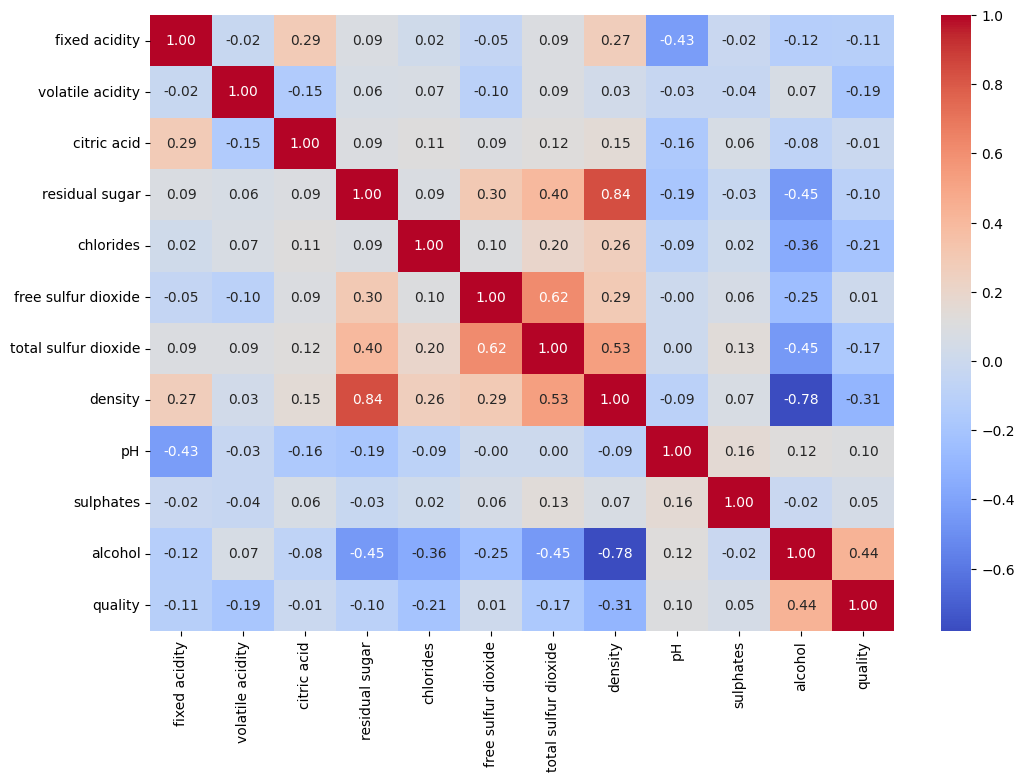

In [ ]:
# Eksik veriler kontrolü
print(df.isnull().sum())

# Korelasyon matrisini görüntüleme
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Özellikleri alıyoruz (hedef değişkeni hariç)
X = df.drop('quality', axis=1)

# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sonuçları kontrol edelim
print("Özellikler (standartlaştırılmış):")
print(X_scaled[:5])  # İlk 5 gözlemi yazdıralım


Özellikler (standartlaştırılmış):
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01  1.00282190e-01
   1.93522599e-01 -3.12141119e-01 -9.73335626e-01  3.58664800e-01
   4.75101984e-01 -4.36815783e-01 -3.36667007e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Hedef değişkeni ve özellikleri ayırma
y = df['quality']
X = X_scaled  # Standartlaştırılmış özellikler

# Veriyi eğitim ve test olarak bölelim (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturma
model = LogisticRegression(max_iter=1000)

# Modeli eğitim verisiyle eğitelim
model.fit(X_train, y_train)

# Eğitim setinde tahmin
y_train_pred = model.predict(X_train)

# Test setinde tahmin
y_test_pred = model.predict(X_test)

# Eğitim doğruluğu
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test doğruluğu
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Train Accuracy: 0.5480
Train F1 Score: 0.5129
Test Accuracy: 0.5306
Test F1 Score: 0.4970


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verisiyle eğitelim
rf_model.fit(X_train, y_train)

# Eğitim setinde tahmin
y_train_pred_rf = rf_model.predict(X_train)

# Test setinde tahmin
y_test_pred_rf = rf_model.predict(X_test)

# Eğitim doğruluğu
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')

# Test doğruluğu
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print(f"Train Accuracy (Random Forest): {train_acc_rf:.4f}")
print(f"Train F1 Score (Random Forest): {train_f1_rf:.4f}")
print(f"Test Accuracy (Random Forest): {test_acc_rf:.4f}")
print(f"Test F1 Score (Random Forest): {test_f1_rf:.4f}")


Train Accuracy (Random Forest): 1.0000
Train F1 Score (Random Forest): 1.0000
Test Accuracy (Random Forest): 0.6898
Test F1 Score (Random Forest): 0.6821


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametrelerin belirlenmesi
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV ile parametre ayarlarını yapma
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreler ve model
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Modeli tekrar eğitim verisiyle eğitelim
best_rf_model.fit(X_train, y_train)

# Test setinde tahmin
y_test_pred_best_rf = best_rf_model.predict(X_test)

# Test doğruluğu ve F1 skoru
test_acc_best_rf = accuracy_score(y_test, y_test_pred_best_rf)
test_f1_best_rf = f1_score(y_test, y_test_pred_best_rf, average='weighted')

print(f"Test Accuracy (Best Random Forest): {test_acc_best_rf:.4f}")
print(f"Test F1 Score (Best Random Forest): {test_f1_best_rf:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy (Best Random Forest): 0.6959
Test F1 Score (Best Random Forest): 0.6875


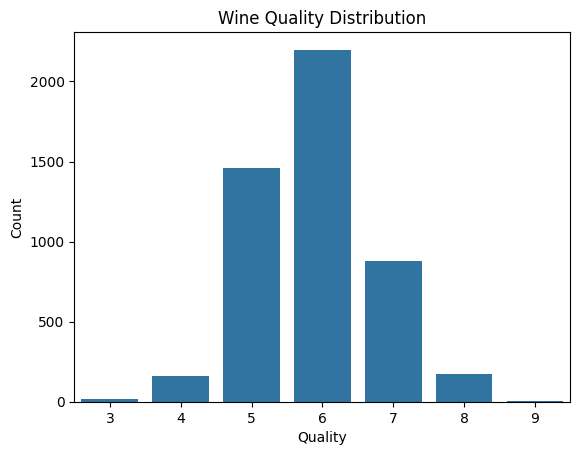

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'quality' hedef değişkeninin sınıf dağılımını inceleyelim
sns.countplot(x='quality', data=df)  # 'df' veri çerçevesi, 'quality' hedef değişkeni
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


In [ ]:
pip install imbalanced-learn


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=3)  # k_neighbors değerini düşürelim
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Yeniden modelimizi eğitelim
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Test verisi ile tahmin yapalım
y_pred = model.predict(X_test)

# Sonuçları değerlendirelim
from sklearn.metrics import classification_report, confusion_matrix

# Karışıklık matrisi ve sınıflandırma raporunu yazdıralım
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  1   0   3   1   0   0]
 [  1  12   9   3   0   0]
 [  2  18 205  58   7   1]
 [  1   8  77 272  63  11]
 [  0   1   5  43 129  14]
 [  0   0   1   3  13  18]]

Classification Report:
              precision    recall  f1-score   support

           3       0.20      0.20      0.20         5
           4       0.31      0.48      0.38        25
           5       0.68      0.70      0.69       291
           6       0.72      0.63      0.67       432
           7       0.61      0.67      0.64       192
           8       0.41      0.51      0.46        35

    accuracy                           0.65       980
   macro avg       0.49      0.53      0.51       980
weighted avg       0.66      0.65      0.65       980

